# Heart Failure

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**How to use this dataset** <br>
Create a model for predicting mortality caused by Heart Failure.

## Import Libraries

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats.mstats import winsorize

import math
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [34]:
data = pd.read_csv(r'Data\heart_failure_clinical_records_dataset.csv',encoding='latin-1')

## First Review and Clean Data

In [35]:
data.shape

(299, 13)

In [36]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Sex - Gender of patient Male = 1, Female =0 <br>
Age - Age of patient<br>
Diabetes - 0 = No, 1 = Yes<br>
Anaemia - 0 = No, 1 = Yes<br>
High_blood_pressure - 0 = No, 1 = Yes<br>
Smoking - 0 = No, 1 = Yes<br>
DEATH_EVENT - 0 = No, 1 = Yes<br>

### Cleaning Column Names

In [37]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Column Names are already written in a clean format (lower case & underscore instead of space). <br>
Only Column Name to correct is DEATH_EVENT which I will also convert to lower case.

In [38]:
data.columns = [column.lower() for column in data.columns]

In [39]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

### Review DTypes

In [8]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object

In [9]:
# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia

#data = data.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})

In [10]:
data.dtypes

age                           int64
anaemia                     boolean
creatinine_phosphokinase      int64
diabetes                    boolean
ejection_fraction             int64
high_blood_pressure         boolean
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                         boolean
smoking                     boolean
time                          int64
death_event                 boolean
dtype: object

### Null Values

In [40]:
data.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
death_event                 False
dtype: bool

No null values present in this dataset

### Drop Duplicates

In [41]:
data.shape

(299, 13)

In [42]:
data = data.drop_duplicates()

In [43]:
data.shape

(299, 13)

No duplicates present in this dataset

### Data Values

In [44]:
for col in data:
    print(data[col].value_counts(), '\n')

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64 

0    170
1    129
Name: anaemia, dtype: int64 

582     47
66       4
129      4
84       3
231      3
        ..
395      1
754      1
2334     1
2695     1
514      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64 

0    174
1    125
Name: diabetes, dtype: int64 

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55  

## Explore Cleaned Data

### Check for Correlation

In [82]:
round(data.corr()['death_event'].sort_values(ascending=False),2)

death_event                 1.00
serum_creatinine            0.29
age                         0.25
high_blood_pressure         0.08
anaemia                     0.07
creatinine_phosphokinase    0.06
diabetes                   -0.00
sex                        -0.00
smoking                    -0.01
platelets                  -0.05
serum_sodium               -0.20
ejection_fraction          -0.27
time                       -0.53
Name: death_event, dtype: float64

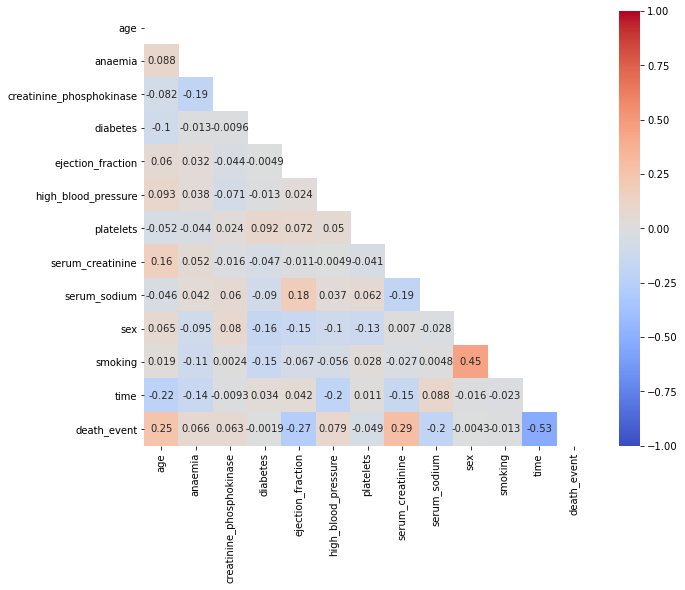

In [84]:
# create correlation heatmap 

mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

 Just having a first looka at correlation none of the features shows a high correlation with the target variable (death_event)

### Review Variable by Variable

In [ ]:
# impact of gender

In [ ]:
# impact of age

In [ ]:
# impact of diabetes

## Deal with Outliers

## Deal with Data Imbalance

## Build Models

In [49]:
y = data['death_event']
X = data.drop('death_event', axis=1)

In [50]:
y.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: death_event, dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
len(X_test), len(X_train), len(y_train), len(y_test)

(90, 209, 209, 90)

In [68]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [69]:
classification.score(X_test, y_test)

0.8

In [70]:
# prediction for either death or no death

predictions = classification.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [71]:
# probability for either death or no death

predictions_ = classification.predict_proba(X_test)
predictions_

array([[9.64824679e-01, 3.51753215e-02],
       [9.89130215e-01, 1.08697853e-02],
       [8.65773928e-01, 1.34226072e-01],
       [9.70127856e-02, 9.02987214e-01],
       [8.38442686e-01, 1.61557314e-01],
       [9.82959308e-01, 1.70406921e-02],
       [4.27174833e-01, 5.72825167e-01],
       [9.07913462e-01, 9.20865384e-02],
       [5.89338694e-02, 9.41066131e-01],
       [7.93309211e-01, 2.06690789e-01],
       [8.08941414e-01, 1.91058586e-01],
       [8.77667658e-01, 1.22332342e-01],
       [8.47088350e-01, 1.52911650e-01],
       [7.01733974e-01, 2.98266026e-01],
       [5.06166173e-01, 4.93833827e-01],
       [3.91966729e-01, 6.08033271e-01],
       [9.01370817e-01, 9.86291832e-02],
       [6.27454790e-01, 3.72545210e-01],
       [7.34896116e-01, 2.65103884e-01],
       [4.66760014e-01, 5.33239986e-01],
       [6.16476159e-01, 3.83523841e-01],
       [8.17657925e-01, 1.82342075e-01],
       [9.09122531e-01, 9.08774685e-02],
       [3.29852209e-01, 6.70147791e-01],
       [3.163107

In [72]:
confusion_matrix(y_test, predictions)

array([[50,  3],
       [15, 22]], dtype=int64)

In [73]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix

array([[0.55555556, 0.03333333],
       [0.16666667, 0.24444444]])

<AxesSubplot:>

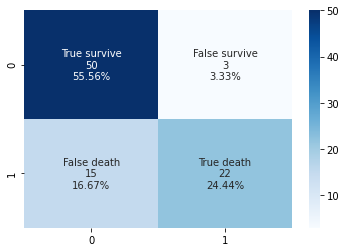

In [81]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True survive', 'False survive',
               'False death', 'True death']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Conclusion

- Question: Are we happy with a model that predicts almost 17% deaths when patients actually survive? <br>
- Also from total deaths 25 deaths we predicted 22 correct and 3 incorrect <br>
- From my perspective we should not predict any "false survivals" <br>


## To Do's

- Visually review connections of variables to target variable <br>
- Find ways to improve the Model <br>
- Use transformation/normalization techniques <br>
- Check for and remove Outliers <br>
- Possibly drop columns or encode boolean columns <br>